# K-Nearest Neighbors from Scratch (Using NumPy)
---

## Importing Project Dependencies
---

As the first step, let us import the necessary Python modules.

In [191]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Now, let us import our dataset.

In [192]:
# importing the data from a csv file
wine_df = pd.read_csv('winequality-red.csv', sep = ';')

# printing the first few rows of our data
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Data Wrangling and EDA
---

### Checking Null Values-

In [193]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


### Statistical Analysis of Data-

In [194]:
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### Standardizing the Data-

In [195]:

# step-1: Seperating the features set and the target array
features = wine_df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']] 
features = features.to_numpy() # converts feature set to numpy array
target = wine_df['quality'].to_numpy() # converts target column to numpy array

In [196]:
# step-2: Function for standardizing data
def standardScaler(feature_array):
    """Takes the numpy.ndarray object containing the features and performs standardization on the matrix.
    The function iterates through each column and performs scaling on them individually.
    
    Args-
        feature_array- Numpy array containing training features
    
    Returns-
        feature_array- Standardized feature set
    """
    
    total_cols = feature_array.shape[1] # total number of columns 
    for i in range(total_cols): # iterating through each column
        feature_col = feature_array[:, i]
        mean = feature_col.mean() # mean stores mean value for the column
        std = feature_col.std() # std stores standard deviation value for the column
        feature_array[:, i] = (feature_array[:, i] - mean) / std # standard scaling of each element of the column
    return feature_array

In [197]:
# step-3: Performing standardization on our feature set
features_scaled = standardScaler(features) 
features_scaled

array([[-0.52835961,  0.96187667, -1.39147228, ...,  1.28864292,
        -0.57920652, -0.96024611],
       [-0.29854743,  1.96744245, -1.39147228, ..., -0.7199333 ,
         0.1289504 , -0.58477711],
       [-0.29854743,  1.29706527, -1.18607043, ..., -0.33117661,
        -0.04808883, -0.58477711],
       ...,
       [-1.1603431 , -0.09955388, -0.72391627, ...,  0.70550789,
         0.54204194,  0.54162988],
       [-1.39015528,  0.65462046, -0.77526673, ...,  1.6773996 ,
         0.30598963, -0.20930812],
       [-1.33270223, -1.21684919,  1.02199944, ...,  0.51112954,
         0.01092425,  0.54162988]])

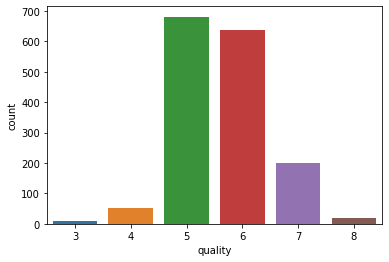

In [198]:
sns.countplot('quality', data=wine_df)

### Training and Validation Split-

In [199]:

def train_test_split(features, target, test_size = 0.2):
    """Splits dataset into training and testing sets.
    
    Args- 
        features- The feature matrix of the dataset (numpy array)
        target- The target array (numpy array)
        test_size- Size of test dataset that you want
    
    Returns-
        train_features, train_target, test_features, test_target 
    """
    num_total_rows = features.shape[0] # total rows in the dataset
    num_test_rows = np.round(num_total_rows * test_size) # total rows in testing dataset
    rand_row_num = np.random.randint(0, int(num_total_rows), int(num_test_rows)) # randomly generated row numbers
    
    # train and test features
    test_features = np.array([features[i] for i in rand_row_num]) # creates test feature set
    train_features = np.delete(features, rand_row_num, axis = 0) # deletes test data rows from main dataset; making it training dataset

    # train and test target
    test_target = np.array([target[i] for i in rand_row_num]) # creates test target set
    train_target = np.delete(target, rand_row_num, axis = 0) # creates training target set
    
    return train_features, train_target, test_features, test_target 

In [200]:
# running split function on our dataset
X_train, y_train, X_test, y_test = train_test_split(features, target, test_size = 0.2)

# printing the shape of the splits
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1312, 11), (1312,), (320, 11), (320,))

### Euclidean Distance-

In [201]:
def euclidean_dist(pointA, pointB):
    """Calculates the euclidean distance between two vectors (numpy arrays).

    Args-
        pointA- First vector
        pointB- Second vector
    Returns-
        distance- Euclidean distance between A and B
    """
    distance = np.square(pointA - pointB) # (ai-bi)**2 for every point in the vectors
    distance = np.sum(distance) # adds all values
    distance = np.sqrt(distance) 
    return distance

In [202]:
def distance_from_all_training(test_point):
    """Calculates euclidean distance of test point from all the points in the training dataset

    Args- 
        test_point- Data point from test set
    Returns- 
        dist_array- Array holding distance values for all training data points 
    """
    dist_array = np.array([])
    for train_point in X_train:
        dist = euclidean_dist(test_point, train_point)
        dist_array = np.append(dist_array, dist)
    return dist_array

In [203]:
dist_array = distance_from_all_training(X_test[0])
dist_array

array([1.80969356, 2.21632816, 4.63892649, ..., 2.87210917, 2.63658722,
       3.73944572])

### Implementing KNN Classification Model-

In [204]:
def KNNClassifier(train_features, train_target, test_features, k = 5):
    """Performs KNN classification on the test feature set.
    Args- 
        train_features- This denotes the feature set of the training data
        train_target- Target lables of the training data
        test_features- Feature set of the test data; assumed unlabeled
        k (default = 5)- Number of closest neighboring training data points to be considered
    Returns-
        predictions- Array of target predictions for each test data instance 
    """
    predictions = np.array([])
    train_target = train_target.reshape(-1,1)
    for test_point in test_features: # iterating through every test data point 
        dist_array = distance_from_all_training(test_point).reshape(-1,1) # calculating distance from every training data instance
        neighbors = np.concatenate((dist_array, train_target), axis = 1) 
        neighbors_sorted = neighbors[neighbors[:, 0].argsort()] # sorts training points on the basis of distance
        k_neighbors = neighbors_sorted[:k] # selects k-nearest neighbors
        frequency = np.unique(k_neighbors[:, 1], return_counts=True)
        target_class = frequency[0][frequency[1].argmax()] # selects label with highest frequency
        predictions = np.append(predictions, target_class)
    
    return predictions

In [209]:
# running inference on the test data
test_predictions = KNNClassifier(X_train, y_train, X_test, k = 5)
test_predictions

array([5., 7., 5., 6., 6., 5., 6., 5., 5., 5., 6., 5., 6., 6., 5., 7., 6.,
       6., 5., 6., 6., 5., 5., 6., 6., 5., 6., 6., 5., 5., 5., 7., 5., 6.,
       6., 5., 5., 5., 5., 5., 6., 5., 4., 7., 7., 6., 6., 5., 5., 6., 5.,
       5., 6., 5., 5., 5., 6., 6., 7., 6., 4., 6., 7., 6., 5., 5., 5., 6.,
       5., 6., 6., 5., 5., 5., 5., 5., 5., 5., 5., 5., 6., 5., 6., 5., 5.,
       5., 5., 5., 6., 5., 5., 5., 5., 5., 5., 5., 5., 6., 6., 6., 6., 6.,
       6., 5., 5., 6., 6., 6., 5., 6., 5., 5., 5., 4., 5., 5., 5., 5., 7.,
       5., 5., 5., 6., 6., 5., 5., 5., 7., 7., 6., 6., 6., 5., 6., 7., 6.,
       6., 6., 5., 5., 5., 5., 7., 5., 5., 5., 6., 6., 5., 7., 6., 6., 5.,
       6., 5., 6., 6., 6., 5., 5., 6., 6., 7., 7., 5., 5., 6., 5., 6., 6.,
       6., 5., 5., 6., 5., 5., 6., 6., 5., 5., 5., 6., 6., 6., 5., 6., 6.,
       5., 6., 5., 5., 6., 6., 6., 5., 7., 7., 5., 6., 5., 5., 5., 6., 5.,
       5., 6., 5., 7., 5., 6., 6., 6., 6., 5., 5., 6., 6., 5., 5., 5., 7.,
       5., 6., 5., 6., 6.

### Model Evaluation-

In [217]:
def accuracy(y_test, y_preds):
    """Calculates inference accuracy of the model.
    
    Args-
        y_test- Original target labels of the test set
        y_preds- Predicted target lables
    Returns-
        acc
    """
    total_correct = 0
    for i in range(len(y_test)):
        if int(y_test[i]) == int(y_preds[i]):
            total_correct += 1
    acc = total_correct/len(y_test)
    return acc

In [219]:
acc = accuracy(y_test, test_predictions)
print('Model accuracy (Scratch) = ', acc*100)

Model accuracy (Scratch) =  57.8125


In [220]:
from sklearn.neighbors import KNeighborsClassifier as KNN

model = KNN()
model.fit(X_train, y_train)
preds = model.predict(X_test)

acc = accuracy(y_test, preds)
print('Model accuracy (Sklearn) = ', acc*100)

Model accuracy (Sklearn) =  57.8125


### Model Optimization

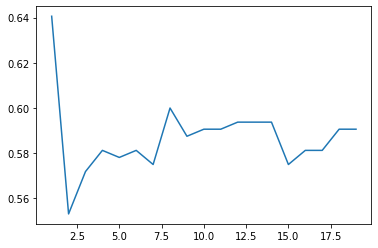

In [222]:
k_values = list(range(1,20))
accuracy_list = []
for k in k_values:
    test_predictions = KNNClassifier(X_train, y_train, X_test, k)
    accuracy_list.append(accuracy(y_test, test_predictions))

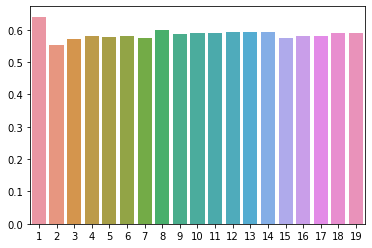

In [244]:
sns.barplot(k_values, accuracy_list)

In [245]:
# running inference for k=8
test_predictions = KNNClassifier(X_train, y_train, X_test, k = 8)

# checking the accuracy
acc = accuracy(y_test, test_predictions)
print('Model accuracy (k = 8) = ', acc*100)

Model accuracy (k = 8) =  60.0
